<a href="https://colab.research.google.com/github/jppasso/Computer-Graphics-University-Assignment-CSV40/blob/main/Vegetables2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

# Import Kaggle Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joaopassos","key":"503dc7e31a72caa4a7b8fe1f3b41074f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-16 08:33:52          10737  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6562  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2475  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2654  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

 99% 1.40G/1.41G [00:11<00:00, 166MB/s]
100% 1.41G/1.41G [00:11<00:00, 131MB/s]


In [ ]:
! mkdir vegetables

In [ ]:
! unzip fresh-and-stale-images-of-fruits-and-vegetables.zip -d vegetables

Streaming output truncated to the last 5000 lines.
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.56 PM.png  
  inflati

# Libraries Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print(tf.__version__)

2.5.0


# Data Set Up

Set Data Directory

In [ ]:
data_dir = pathlib.Path('/content/vegetables')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

10144


Data Exploration

In [ ]:
fresh_apples = list(data_dir.glob('fresh_apple/*'))
PIL.Image.open(str(fresh_apples[0]))

In [ ]:
PIL.Image.open(str(fresh_apples[1]))

In [ ]:
fresh_bananas = list(data_dir.glob('fresh_banana/*'))
PIL.Image.open(str(fresh_bananas[0]))

In [ ]:
PIL.Image.open(str(fresh_bananas[1]))

Load Parameters

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

val_split = 0.2
seed_ref = 123

Dataset Split

In [ ]:
# Standard Keras Tutorial Pre-processing
# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=val_split,
  subset="training",
  seed=seed_ref,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=val_split,
  subset="validation",
  seed=seed_ref,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14682 files belonging to 12 classes.
Using 11746 files for training.
Found 14682 files belonging to 12 classes.
Using 2936 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']


Visualize Data

In [ ]:
# First 9 Images in the Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Standardize Data


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

In [ ]:
# Pre-process MobilNetV2
train_ds = train_ds.map(lambda x, y: (tf.keras.applications.mobilenet_v2.preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.applications.mobilenet_v2.preprocess_input(x), y))

In [ ]:
# Pre-process DenseNet121
#Crashed
train_ds = train_ds.map(lambda x, y: (tf.keras.applications.densenet.preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.applications.densenet.preprocess_input(x), y))

In [ ]:
# Pre-process Exception
train_ds = train_ds.map(lambda x, y: (tf.keras.applications.xception.preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.applications.xception.preprocess_input(x), y))

Configure For Performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Trained Model Application

# Model

Create Model

In [ ]:
num_classes = 12

In [ ]:
# Standard Keras Tutorial Model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# MobileNet V2 Model
model = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)

In [ ]:
# EfficientNet B0 Model
model = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)

In [ ]:
# Xception Model
model = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
# DenseNet121
model = tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=num_classes,
)

Compile Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

Model Training

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


368/368 [==============================] - ETA: 0s - loss: 0.7174 - accuracy: 0.7449 

KeyboardInterrupt: ignored

Training Results

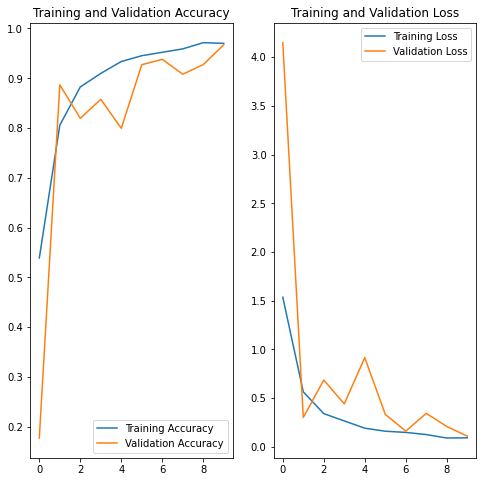

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict on new data

In [ ]:
stale_banana_path = '/content/vegetables/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 8.47.28 PM.png'

img = keras.preprocessing.image.load_img(
    stale_banana_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to stale_banana with a 19.81 percent confidence.
